### Adj close移動平均

In [7]:
%matplotlib inline

import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

In [14]:
site = "https://query1.finance.yahoo.com/v7/finance/download/4958.TW?period1=0&period2=1549258857&interval=1d&events=history&crumb=hP2rOschxO0"
response = requests.post(site)

    1) index_col是將Date這個column當作是index
    2) parse_dates是將Date轉換成程式瞭解的日期格式，而非單純的字串

In [21]:
df = pd.read_csv(StringIO(response.text), index_col = 'Date', parse_dates=['Date'])
df = df.drop('Volume', axis = 1)

In [23]:
ma_list = [5, 20, 60]

In [24]:
for ma in ma_list:
    df['MA_' + str(ma)] = df['Adj Close'].rolling(ma).mean()

In [25]:
df

,Open,High,Low,Close,Adj Close,MA_5,MA_20,MA_60
Date,,,,,,,,
2011-12-26,45.260799,47.074799,43.537399,45.351501,33.599689,NaN,NaN,NaN
2011-12-27,45.170101,47.528400,44.172298,47.165501,34.943638,NaN,NaN,NaN
2011-12-28,46.621300,47.074799,45.532902,47.074799,34.876431,NaN,NaN,NaN
2011-12-29,46.349201,46.802700,45.986401,46.802700,34.674843,NaN,NaN,NaN
2011-12-30,46.984100,47.346901,46.349201,47.346901,35.078018,34.634524,NaN,NaN
2012-01-02,47.346901,47.346901,47.346901,47.346901,35.078018,34.930190,NaN,NaN
2012-01-03,47.346901,47.346901,47.346901,47.346901,35.078018,34.957066,NaN,NaN
2012-01-04,47.346901,47.346901,47.346901,47.346901,35.078018,34.997383,NaN,NaN
2012-01-05,47.346901,47.346901,47.346901,47.346901,35.078018,35.078018,NaN,NaN


台股 4958


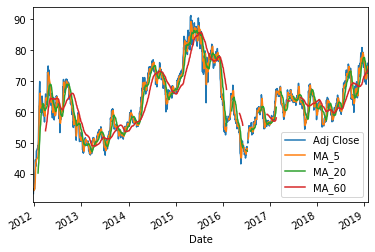

In [26]:
print('台股 ' + site[53: 57])
df.loc[:, 'Adj Close': 'MA_60'].plot();